In [1]:
%load_ext autoreload
%autoreload 2   

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from qdm.config.system import System
from qdm.measurements.esr import ESR
from qdm.routines.esr_optim import esr_optim

In [3]:
# create an object of the system and initalise the equipment
# qdm = System(name = "cryo",
#              config_file='../src/qdm/config/cryo.json') 

qdm = System(name = "GMX",
             tag="testing",
             config_file='../../src/qdm/config/GMX.json') 



Using the custom tag: ( testing ) for the data directory.
Connected to Camera: ZYLA-5.5-USB3-W
Connected to rf source: windfreak


In [5]:
# Define rf parameters
qdm.rf.set_freq(3500)
qdm.rf.set_power(-22)
qdm.rf.set_output(1)

# Define camera parameters
qdm.cam.image_size = (256, 256)
qdm.cam.bin = 1


Setting the roi to:  (1152, 1408, 952, 1208)


Data stored successfully!


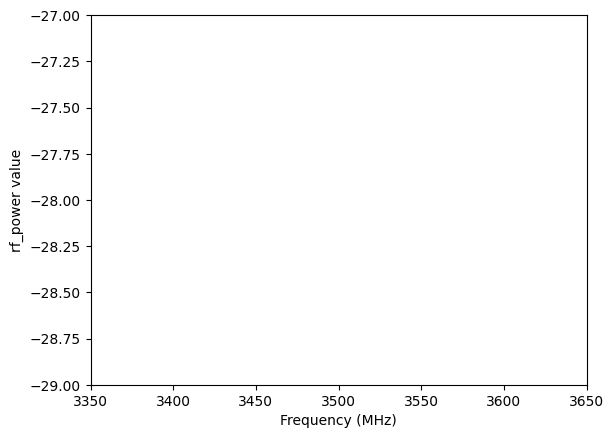

In [37]:
# create an object of the ODMR measurement
param = 'rf_power'

data_dict = esr_optim( qdm,          
                param,
                min_val = -30,
                max_val = -20,
                num = 6,
                int_time = 50e-3,
                laser_dur = 3e-3,
                rf_dur = 2e-6,
                freq_center = 3500,
                freq_num = 51,
                freq_range = 200,
                esr_type = "cw",
                ref_bool = True,
                ref_type = "no_rf", 
                num_sweeps = 10,
                peak_neg = False,
                remove_start = 2)



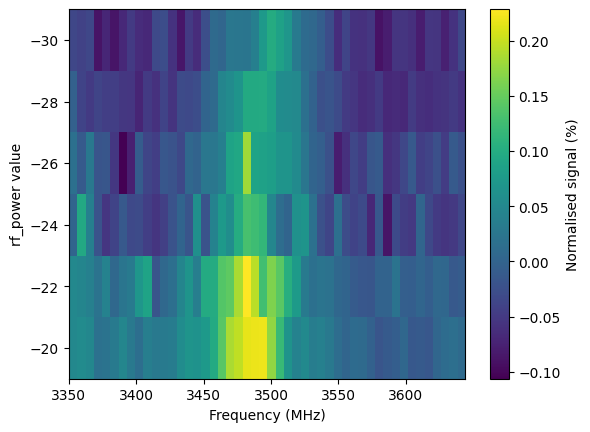

In [94]:
remove_start = 2
remove_end = 0

f_list = data_dict["freq_list"]
val_list = data_dict["val_list"]
spectra_list = data_dict["spectra_list"]
val_step = val_list[1] - val_list[0]

plt.imshow(spectra_list[:,remove_start:-1], 
        aspect='auto', 
        extent=[f_list[0], 
                f_list[-1], 
                val_list[-1] + 0.5*val_step, 
                val_list[0] - 0.5*val_step])
plt.xlabel("Frequency (MHz)")
plt.ylabel(f"{param} value")
cb = plt.colorbar()
cb.set_label("Normalised signal (%)")

In [50]:
spectra_list[::, remove_start:0]

array([], shape=(6, 0), dtype=float64)

In [52]:
data_dict['val_list']

f_fit = []
a_fit = []
w_fit = []
c_fit = []

for fit in data_dict['fit_params']:
    f_fit.append(fit[0])
    a_fit.append(fit[1])
    w_fit.append(fit[2])
    c_fit.append(fit[3])


Text(0, 0.5, 'Norm bck (a.u.)')

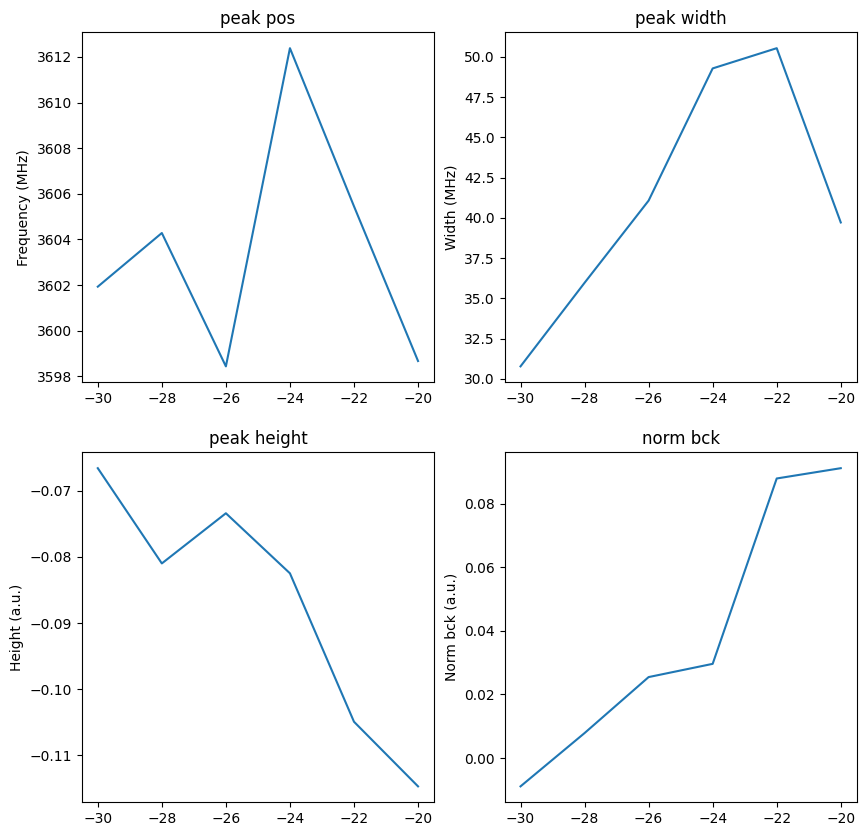

In [91]:
# Plot the fit results
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(data_dict['val_list'], f_fit)
plt.title('peak pos')
plt.ylabel('Frequency (MHz)')

plt.subplot(2,2,2)
plt.plot(data_dict['val_list'], np.abs(w_fit))
plt.title('peak width')
plt.ylabel('Width (MHz)')

plt.subplot(2,2,3)
plt.plot(data_dict['val_list'], a_fit)
plt.title('peak height')
plt.ylabel('Height (a.u.)')

plt.subplot(2,2,4)
plt.plot(data_dict['val_list'], data_dict['pl_list'])
plt.title('Counts')
plt.ylabel('maximum counts (counts)')



Text(0, 0.5, 'Sensitivity (μT/√Hz)')

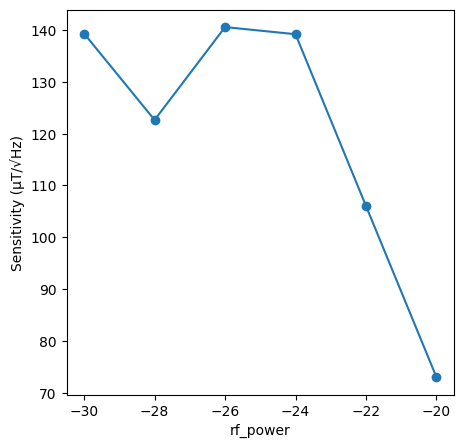

In [90]:

# plot the sensitivity
plt.figure(figsize=(5,5))
plt.plot(data_dict['val_list'], 1e6*data_dict['sensitivity_list'], 'o-')
plt.xlabel(param)
plt.ylabel("Sensitivity (μT/√Hz)")